Breast Cancer Wisconsin (Diagnostic) Data Set

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.cm as cm
import os
%matplotlib inline
from sklearn import preprocessing
from subprocess import check_output
current_working_directory = os.getcwd()
print(f"current working directory: {current_working_directory}")
#
print(check_output(["ls", "../input"]).decode("utf8"))






/home/michellewli/quantum_programming_project/clustering_tumor_cells
data.csv



In [ ]:
# Read the data file
data = pd.read_csv('../input/data.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Cleaning and modifying the data
data = data.drop('id',axis=1)
data = data.drop('Unnamed: 32',axis=1)
# Mapping Benign to 0 and Malignant to 1 
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
# Scaling the dataset
datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))
datas.columns = list(data.iloc[:,1:32].columns)
datas['diagnosis'] = data['diagnosis']
# Creating the high dimensional feature space X
data_drop = datas.drop('diagnosis',axis=1)
X = data_drop.values

#Creating a 2D visualization to visualize the clusters
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.027s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.166389
[t-SNE] Error after 1800 iterations: 0.884610


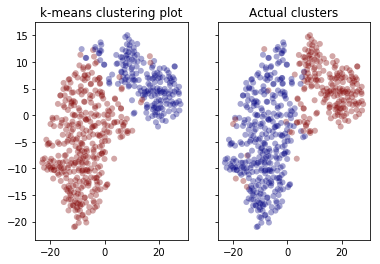

In [ ]:
#Cluster using k-means
from sklearn.cluster import KMeans
kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
kY = kmns.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = datas['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')




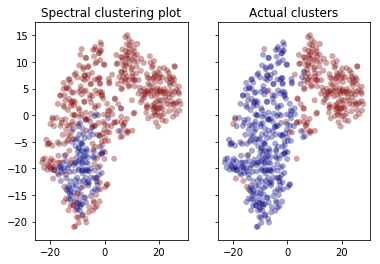

In [ ]:
#Cluster using Spectral clustering and visualize using Isomap
from sklearn.cluster import SpectralClustering


# Play with gamma to optimize the clustering results
kmns = SpectralClustering(n_clusters=2,  gamma=0.5, affinity='rbf', eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=1)
kY = kmns.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('Spectral clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = datas['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')



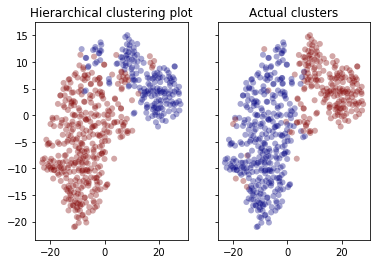

In [ ]:
# Cluster using hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
aggC = AgglomerativeClustering(n_clusters=2, linkage='ward')
kY = aggC.fit_predict(X)


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('Hierarchical clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = datas['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

In [ ]:
# Save classical clustering results to CSV file
classical_results = merged_results[['ID', 'Cluster_classical']].rename(columns={'Cluster_classical': 'Cluster'})
classical_results.to_csv('clustering_results_classical.csv', index=False)
print("Classical clustering results saved to clustering_results_classical.csv")